In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/인사교/DL/언어지능

/content/drive/MyDrive/인사교/DL/언어지능


In [3]:
data = open('./data/modi_output.txt', 'r', encoding = 'utf-8')

In [4]:
lines = data.readlines() # 모든 줄을 읽어와서, 각 줄을 리스트형으로 저장

In [5]:
passages = [] # 본문 담을 리스트
summaries = [] # 요약본 담을 리스트

for line in lines :
  line = line.strip() # 공백제거

  # 탭을 기준으로 첫번째 부분 가져온 다음에 <s></s>를 추구하고 passages에 추가
  passages.append('<s>' + line.split('\t')[0] + '</s>')

  # 탭을 기준으로 두번째 부분 가져온 다음에 <s></s>를 추구하고 summaries에 추가
  summaries.append('<s>' + line.split('\t')[1] + '</s>')

In [7]:
len(passages), len(summaries)

(160002, 160002)

In [8]:
 passages[0]

'<s>자신의 생각을 불명확하게 표현하는 사람들은 생각도 불명확할 가능성이 높다. 따라서 생각을 명료하게 정리하는 것이 명확한 글쓰기의 시작이다. 존 케네스 갈브레이드(John Kenneth Galbraith) 교수는 “아무리 복잡하고 어려운 주제라고 명쾌한 언어로 설명이 가능하다. 하지만 필자가 그 주제에 대해 완전히 이해하지 못하면 절대로 명확하게 쓸 수 없다.”고 했다. 명료한 글은 명료한 생각에서 나온다. 그렇지만 글을 고치다보면 생각도 명료하게 된다. 명료하게 쓰려면 내용을 단순화해야 한다. 많은 것을 전달하려는 욕심을 버리고 한두가지로 선택하고 거기 집중해야 한다. 앞에서 이야기한 간결성은 명확성에 도움이 된다. 명료함은 복잡한 설득기법을 사용하는 것보다 더 중요하다. 판사는 이해할 수 없는 사실관계 진술로는 설득되지 않는다. 설득기법이 명료함을 해치는 때에는 그 기법을 사용하지 않는다.</s>'

In [22]:
data.close()

#### 전처리
- 이모지 제거, 클리닝, 띄어쓰기 교정 등

In [9]:
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab_light_220429.sh

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91 (from 1)
Receiving objects: 100% (138/138), 1.72 MiB | 8.25 MiB/s, done.
Resolving deltas: 100% (65/65), done.
/content/drive/MyDrive/인사교/DL/언어지능/Mecab-ko-for-Google-Colab
Installing konlpy.....
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 30.4 MB/s eta 0:00:00
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2024-09-20 05:17:37--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.142.24, 104.192.142.26, 104.192.142.25, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.142.24|:44

In [10]:
!pip install konlpy emoji kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.7/34.7 MB 18.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 15.7 MB/s eta 0:00:00
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.18.0-py3-none-any.whl size=34843380 sha256=c6c1a47b10ca9d2a51363bd508c85ddd8a53b6411f34d89360ce18b71265feec
  Stored in directory: /root/.cache/pip/wheels/0d/ea/f6/abb93f89cc196467624828ec9c29150c29a8399a589ba50bef
Successfully built kiwipiepy-model


In [11]:
import re
from tqdm.auto import tqdm as tq # 반복현황 출력 도구(auto는 성능이 좀 더 좋음)
import emoji
from konlpy.tag import Mecab
from kiwipiepy import Kiwi
from kiwipiepy.utils import Stopwords

In [12]:
# 정규 표현식 패턴
p = re.compile('[ㅋㅎㄷㅇ~!?.-ㅡ0-9a-zA-Z]+')

# 불용어제거, 띄어쓰기 교정하는 객체들 초기화
kiwi = Kiwi()
stopwords = Stopwords()
mecab = Mecab()

In [13]:
# 이모지 제거 함수
def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

# 텍스트 클리닝 및 형태소 분석 함수
def clean_and_tokenize(text):
    text = " ".join([token for token in text.split() if not p.search(token)])
    text = remove_emoji(text)
    tokens = kiwi.tokenize(text, stopwords=stopwords)
    clean_text = " ".join([token.form for token in tokens])
    corrected_text = kiwi.space(clean_text)
    morphs = mecab.morphs(corrected_text)
    return " ".join(morphs)

# 데이터를 처리하는 함수
def preprocess_data(dataset):
    preprocessed_data = []
    for doc in tq(dataset):
        cleaned_doc = clean_and_tokenize(doc)
        preprocessed_data.append(cleaned_doc)
    return preprocessed_data

In [14]:
# 데이터셋 병합
summary_dataset = passages + summaries

In [15]:
len(summary_dataset)

320004

In [17]:
# 원문 데이터셋이 약 32만개 -> 전부 전처리 수행 시 약 3시간 걸림
# 5000개로 줄여서 전처리해서 실습에 사용
kor_tohenzed_doc = preprocess_data(summary_dataset[:5000])

  0%|          | 0/5000 [00:00<?, ?it/s]

#### 토크화 + 수치화 수행

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
# 텐서플로우에서 제공하는 텍스트 전처리 도구

tokenizer = Tokenizer()

# 각 단어에 고유한 인덱스 번호를 할당(단어사전 만들기)
tokenizer.fit_on_texts(kor_tohenzed_doc)

In [20]:
# 단어사전 확인
word2idx = tokenizer.word_index # {단어 : 인덱스번호}

In [21]:
idx2word = {value : key for key,value in word2idx.items()} # {인덱스번호 : 단어}

In [23]:
# 전처리된 문장들을 인덱스 번호(수치형)으로 변환
encoded = tokenizer.texts_to_sequences(kor_tohenzed_doc) # 텍스트 문장을 숫자로 이루어진 시퀀스로 반환

encoded[0]

[514,
 92,
 897,
 569,
 562,
 169,
 6253,
 4,
 33,
 115,
 514,
 3883,
 1336,
 897,
 4,
 5703,
 973,
 10388,
 833,
 1268,
 4,
 250,
 993,
 138,
 6254,
 1190,
 468,
 3338,
 993,
 1714,
 401,
 226,
 4,
 5236,
 897,
 1040,
 3883,
 1470,
 3883,
 514,
 333,
 1470,
 5237,
 116,
 514,
 3883,
 3883,
 1040,
 1546,
 90,
 1069,
 100,
 872,
 922,
 8273,
 2318,
 102,
 83,
 63,
 334,
 3101,
 599,
 521,
 1181,
 7070,
 897,
 689,
 3883,
 17,
 1268,
 2745,
 1603,
 57,
 27,
 2425,
 401,
 237,
 39,
 1656,
 2745,
 2745,
 1603,
 3883,
 17,
 4867,
 1603,
 57]

In [24]:
# 단어사전 크기 조정
vocab_size = len(word2idx) + 1
vocab_size
# 보통 NLP 모델에서는 0번 인덱스를 패딩값으로 사용하는 경우가 많음

16022

#### Word2Vec
- 단어 임베딩 방법론 중 하나(외에도 fasttext, glove 등)
- 두가지 방법
  - CBOW : 주변 단어들로 중심 단어를 학습/예츠하는 방법
  - SkipGram : 중심 단어들로 주변 단어를 학습/예측하는 방법

---

##### Skipgrag + Nagative Sampling (SGNS)
- 보통 임베딩 품질 : CBOW < Skipgram < SGNS
  - Negative Sampling : Skipgram 모델에서 효율적으로 학습하기 위한 샘플링 기법
  - 진짜 주변 단어(양성샘플)와 까짜 주변 단어(음성샘플)를 가지고 학습을 수행

In [25]:
from tensorflow.keras.preprocessing.sequence import skipgrams # 스킵그램 모델(word2vec에 필요한 데이터 쌍 만들 때 사용하는 도구)

In [27]:
# 학습에 필요한 중심단어와 주변단어 쌍 생성
temp = skipgrams(
    encoded[0],
    vocabulary_size = vocab_size, # 등록된 단어사전 개수 지정
    window_size = 10 # 중심단어로부터 주변 단어를 선정할 개수 기준
    )

In [30]:
len(temp)
# 0번째 리스트 : 단어쌍 리스트 -> [중심단어, 주변단어], [중심단어, 주변단어]...
# 1번째 리스트 : 양성(진짜 주변 단어)/음성(가짜 주변 단어) 레이블

2

In [34]:
temp[1][0]

0

In [35]:
# 5개 확인
temps = [skipgrams(sample, vocabulary_size = vocab_size, window_size = 10) for sample in encoded[:5]]

In [43]:
# 0번째 샘플의 단어 쌍과 레이블(양성/음성) 확인
pairs = temps[0][0]
labels = temps[0][1]
len(pairs), len(labels)

(3260, 3260)

In [44]:
pairs[0][0] # 중심단어 인덱스

2745

In [52]:
# 어떠한 중심단어와 주변단어인지, 그리고 라벨은 무엇인지 확인
for i in range(5):
  print(f'{idx2word[pairs[i][0]]} ({pairs[i][0]}), {idx2word[pairs[i][1]]} ({pairs[i][1]}) -> {labels[i]}')
# pairs[i][0] : 중심 단어의 인덱스
# pairs[i][1] : 주변ㄴ 단어의 인덱스

설득 (2745), 설득 (2745) -> 1
복잡 (1268), 어렵 (250) -> 1
버리 (2318), 청중 (5668) -> 0
글 (1470), 씌 (14384) -> 0
기법 (1603), 모빌리티 (6601) -> 0


In [54]:
# word2vec의 데이터셋 만들기
training_dataset = [skipgrams(sample, vocabulary_size = vocab_size, window_size = 10) for sample in tq(encoded[:50])]
# 데이터셋 자체는 시간이 안걸림
# word2vec 학습을 수행할 때 시간이 많이 걸림

  0%|          | 0/50 [00:00<?, ?it/s]

#### word2vec 모델 구현

In [56]:
from tensorflow.keras.models import Sequential, Model
# Model : 입력과 출력을 정의해서 커스텀 모델을 만들 때 사용

from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
# Embedding : 단어를 고정된 크기의 벡터로 변환하는 레이어
# Reshape : 특정 모양으로 변환하는 레이어
# Dot : 중심 단어랑 주변 단어 간의 연관성을 계산할 때 사용(내적 벡터 계산, dot product)

from tensorflow.keras.utils import plot_model # 모델 구조 시각화
from IPython.display import SVG # 벡터기반 이미지 형식

import numpy as np

In [58]:
# 임베딩 벡터 차원 설정
embeding_dim = 100 # 각 단어들은 100개의 차원으로 벡터화

# 1. 중심단어 입력 & 임베딩을 위한 Layer 설정
# 입력 정의(중심단어)
w_inputs = Input(
    shape = (1, ), # 한번에 하나의 단어 인덱스를 입력 받음
    dtype = 'int32'
    )

In [59]:
word_embedding = Embedding(
    vocab_size, # 단어사전 크기 지정
    embeding_dim # 임베딩 차원 수
)(w_inputs) # 입력받고, 임베딩 레이어를 적용(100차원의 벡터로 변환)시킨다.

# 케라스에서 제공하는 함수형 API

In [60]:
word_embedding

<KerasTensor shape=(None, 1, 100), dtype=float32, sparse=False, name=keras_tensor_1>

In [61]:
# 2. 주변단어 입력 & 임베딩을 위한 Layer 설정
# 입력 정의(주변단어)
c_inputs = Input(
    shape = (1, ), # 한번에 하나의 단어 인덱스를 입력 받음
    dtype = 'int32'
    )

In [62]:
context_embedding = Embedding(
    vocab_size, # 단어사전 크기 지정
    embeding_dim # 임베딩 차원 수
)(c_inputs) # 입력받고, 임베딩 레이어를 적용(100차원의 벡터로 변환)시킨다.

# 케라스에서 제공하는 함수형 API

In [63]:
context_embedding

<KerasTensor shape=(None, 1, 100), dtype=float32, sparse=False, name=keras_tensor_3>

In [65]:
# 3. 중심단어, 주변단어들의 임베딩 벡터를 dot product(내적계산, 연관석을 계산)를 계산을 수행하는 layer
dot_product = Dot(axes = 2)([word_embedding, context_embedding]) # 유사도를 측정하는 layer

In [67]:
# 4. 내적 결과를 1차원으로 변환, sigmoid 적용
dot_product = Reshape((1, ), input_shape = (1, 1))(dot_product)

# 출력결과를 두 단어 사이가 연관될 확률값(시그모이드 출력값)으로 변경
output = Activation("sigmoid")(dot_product)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [69]:
# 5. 전체 모델을 정의
model = Model(inputs = [w_inputs, c_inputs], outputs = output) # 입력층과 출력층만 설정해주면 끝

In [70]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 1)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_1             │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding (Embedding)     │ (None, 1, 100)         │      1,602,200 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_1 (Embedding)   │ (None, 1, 100)         │      1,602,200 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot_1 (Dot)               │ (None, 1, 1)           │              0 │ embedding[0][0],       │
│                           │                        │                │ embedding_1[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 1)              │              0 │ dot_1[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 1)              │              0 │ reshape[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 3,204,400 (12.22 MB)

 Trainable params: 3,204,400 (12.22 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
%cd ../

/content/drive/MyDrive/인사교/DL/언어지능


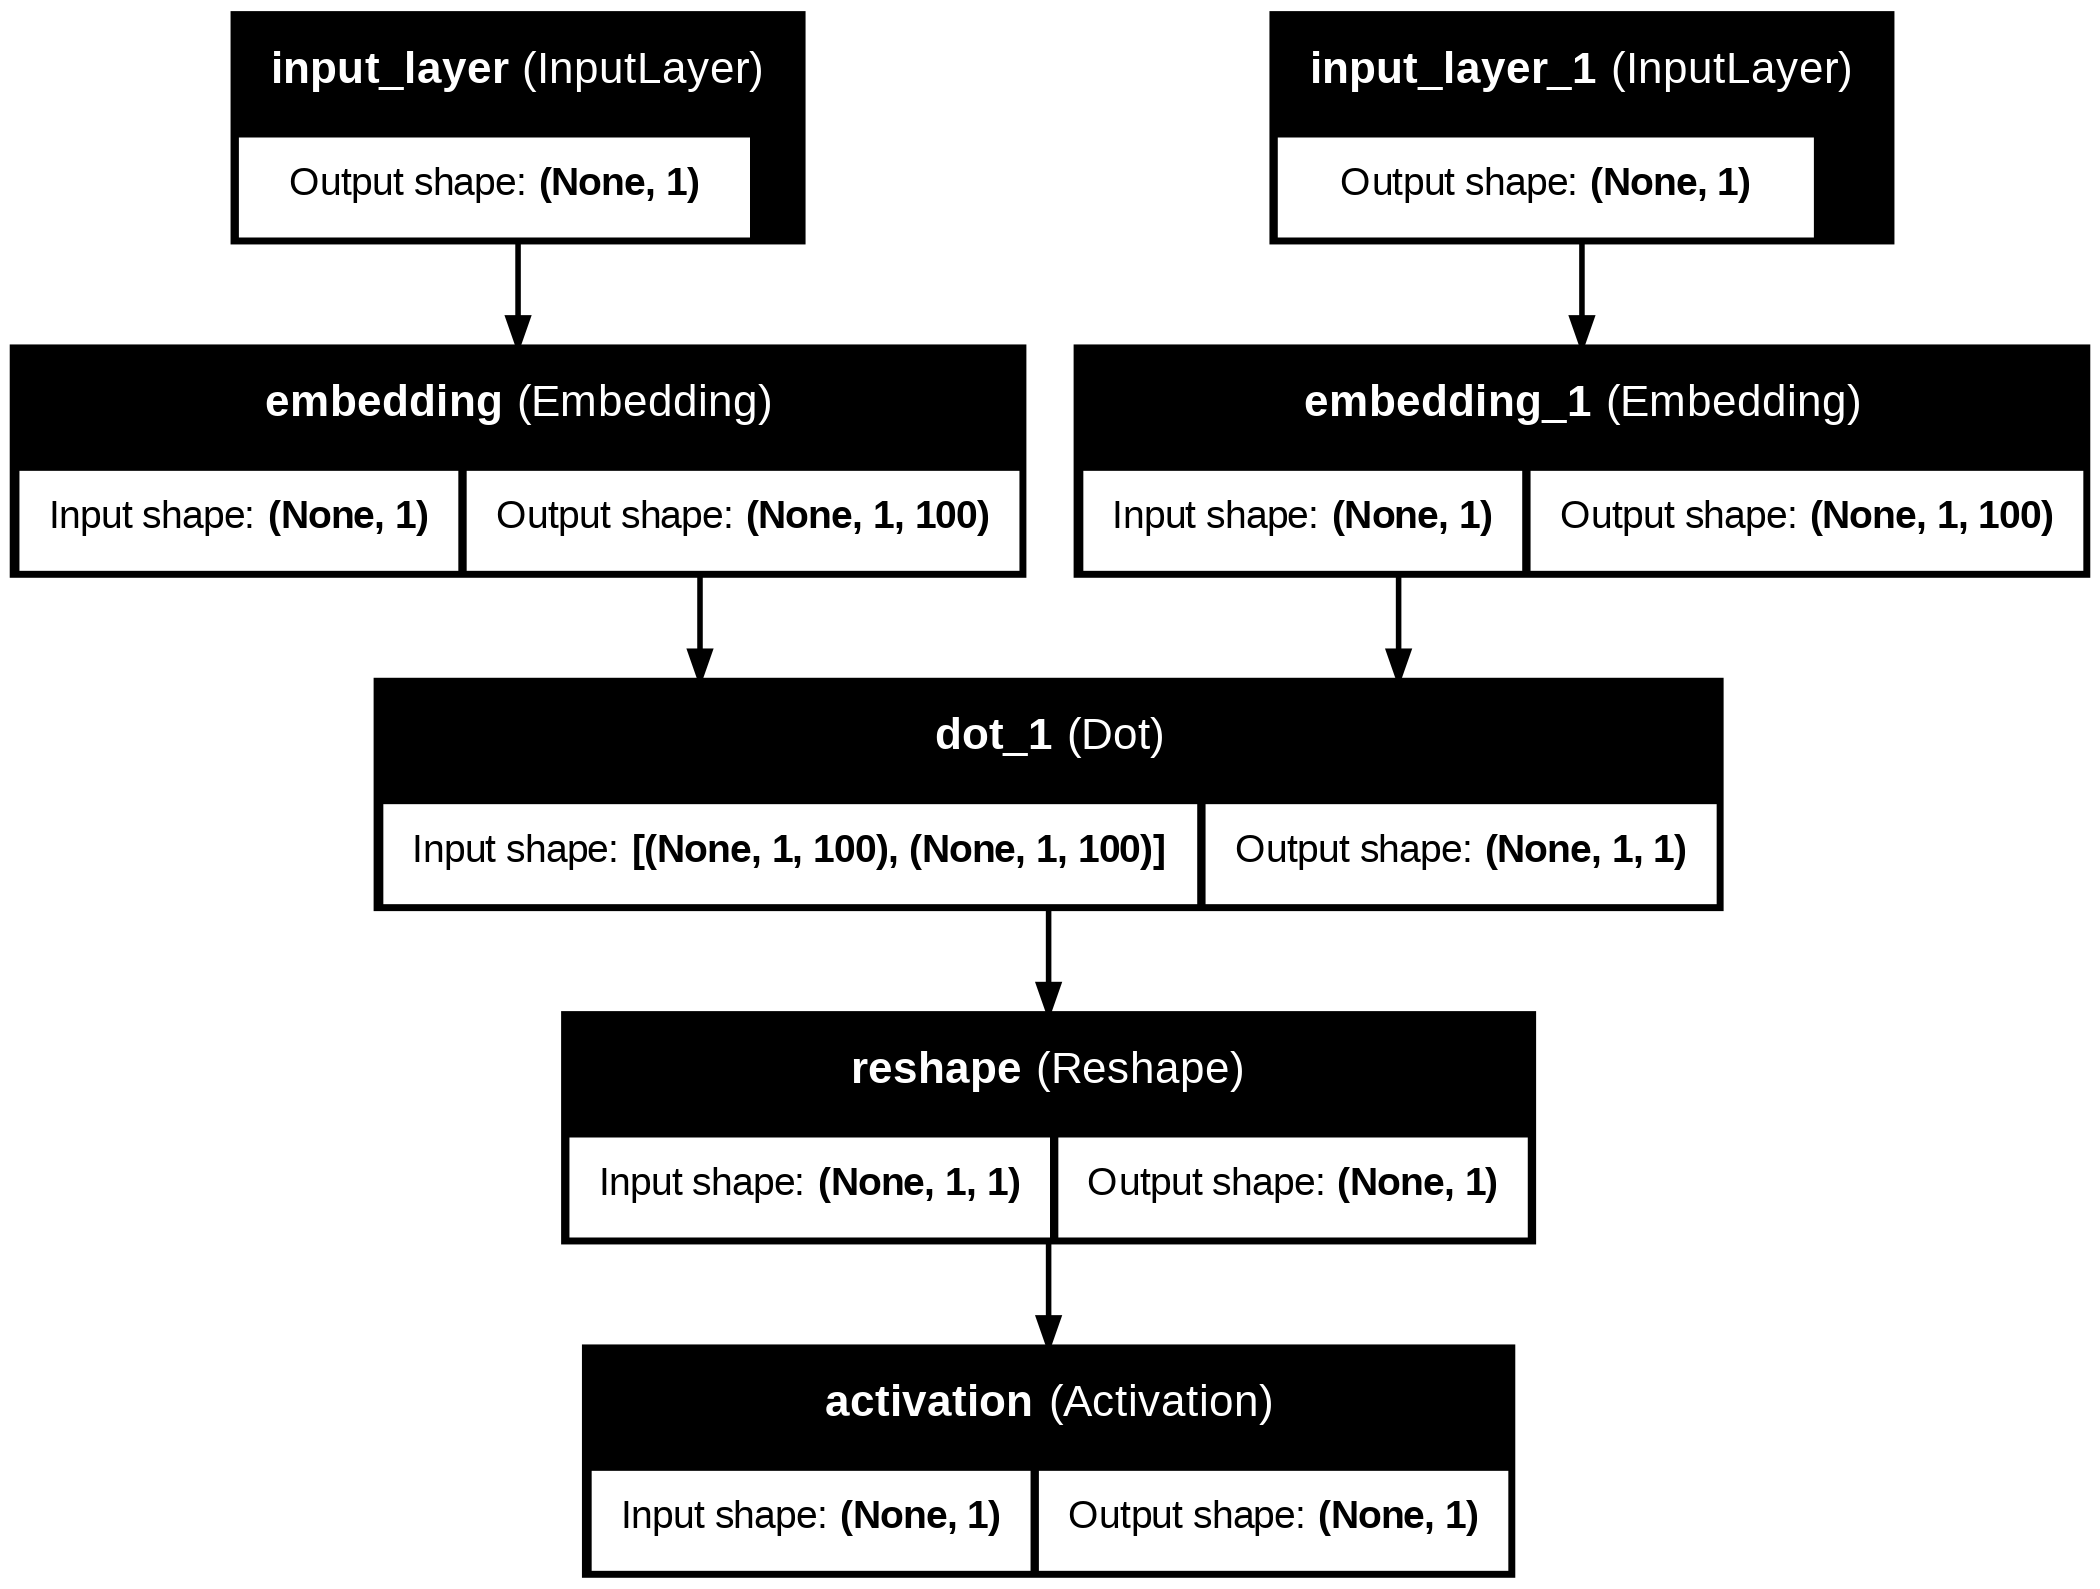

In [77]:
# 학습방법 설정
model.compile(
    loss = 'binary_crossentropy', # 시그모이드 출력값에 사용되는 손실함수
    optimizer = 'Adam'
)
# 매트릭스는 설정 안 함
plot_model(
    model,
    to_file = './data/model.png',
    show_shapes = True, # 각 layer들의 출력 형태를 표시할지 여부
    show_layer_names = True, # 레잉의 이름 표시할지 여부
    rankdir = "TB" # 모델 구조 방향 설정(Top to Bottom) 위에서 아래로
)

In [78]:
# 학습
for epoch in tq(range(5)): # epoch 수
    loss = 0 # 오차값 달아둘 변수 초기화
    for elem in training_dataset: # 각 요소만큼 반복
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32') # 중심 단어 추출
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32') # 주변 단어 추출
        labels = np.array(elem[1], dtype='int32') # 양성, 음성
        X = [first_elem, second_elem] # 문제
        Y = labels # 정답
        loss += model.train_on_batch(X, Y)
    print('Epoch :', epoch + 1, 'Loss :', loss)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch : 1 Loss : 34.657688677310944
Epoch : 2 Loss : 34.598599433898926
Epoch : 3 Loss : 34.41634500026703
Epoch : 4 Loss : 33.75128358602524
Epoch : 5 Loss : 32.10937476158142


In [ ]:
# 학습된 결과 저장
import gensim